In [1]:
# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (20,6)

In [2]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [3]:
from genesis import Genesis
import numpy as np
import os

In [4]:
afile = 'genesis_240db43117c44d363f6b57a21a0606ff.h5'
url='https://portal.nersc.gov/cfs/m669/lume/demo1/'+afile
!wget {url}

--2020-05-18 10:04:13--  https://portal.nersc.gov/cfs/m669/lume/demo1/genesis_240db43117c44d363f6b57a21a0606ff.h5
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.201.128
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538220128 (513M)
Saving to: ‘genesis_240db43117c44d363f6b57a21a0606ff.h5’

genesis_240db43117c 100%[===================>] 513.29M  19.8MB/s    in 24s     

2020-05-18 10:04:37 (21.4 MB/s) - ‘genesis_240db43117c44d363f6b57a21a0606ff.h5’ saved [538220128/538220128]



In [5]:
G = Genesis()
G.load_archive(afile)

# Plot some output

In [6]:
G.output['data']['power'].shape

(498, 647)

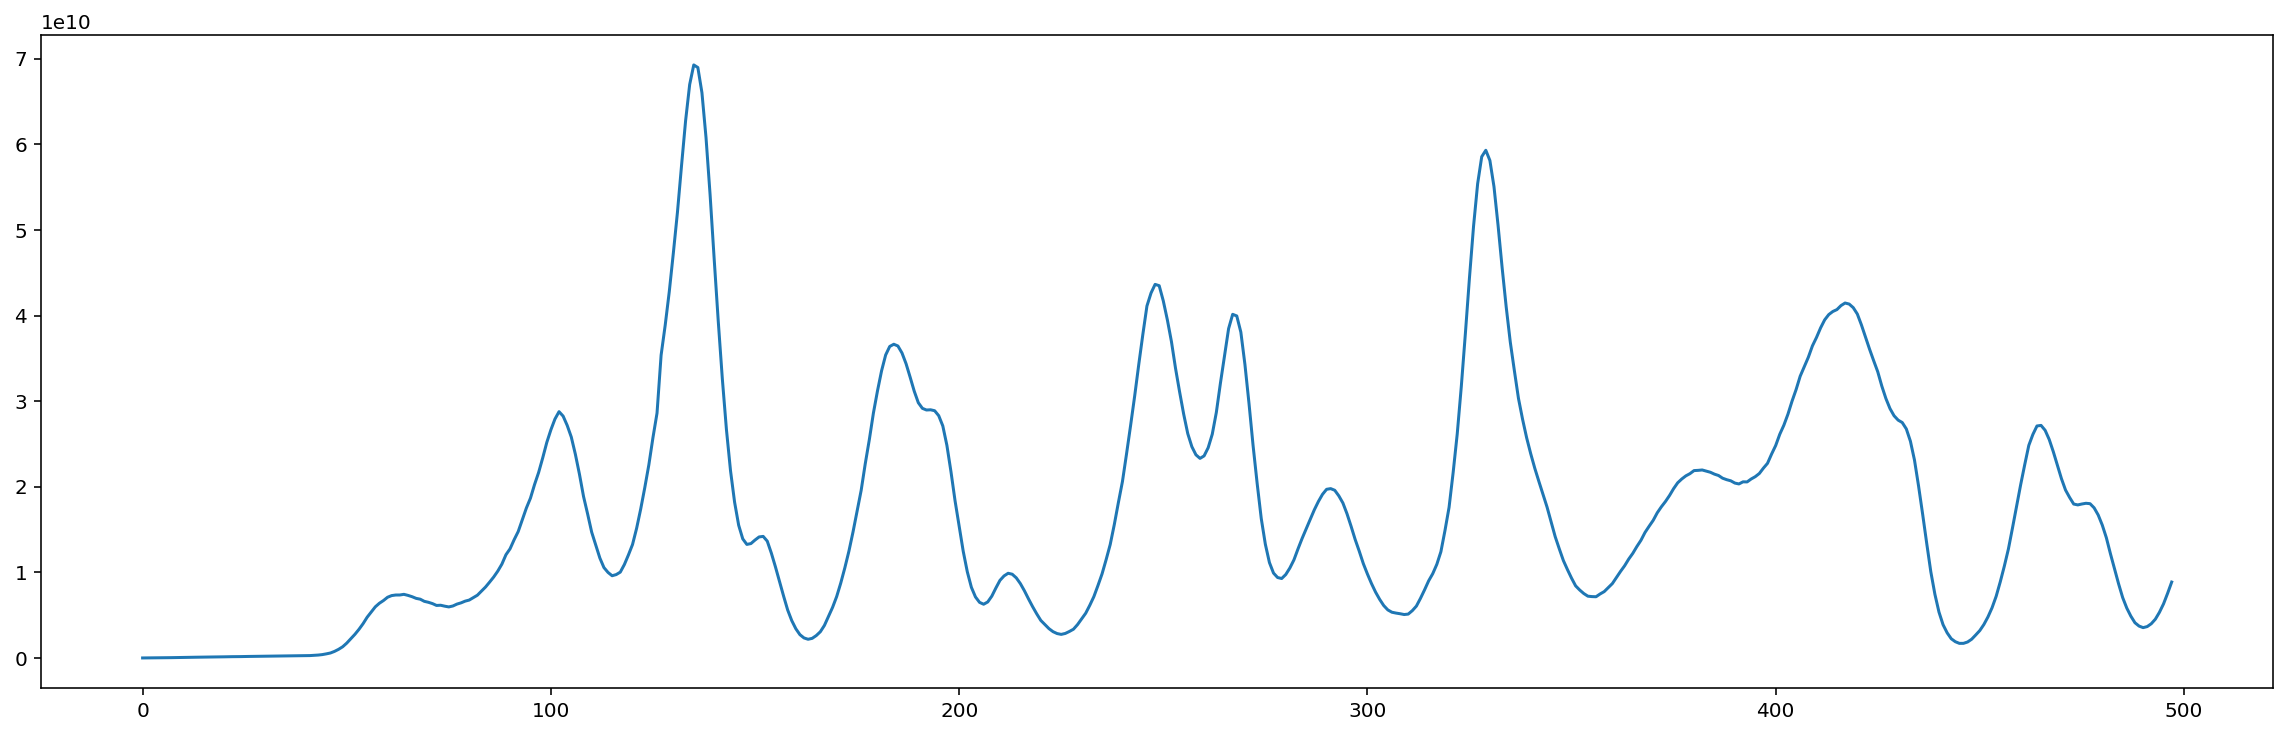

In [7]:
# Power of all slices, final z position
plt.plot(G.output['data']['power'][:, -1])

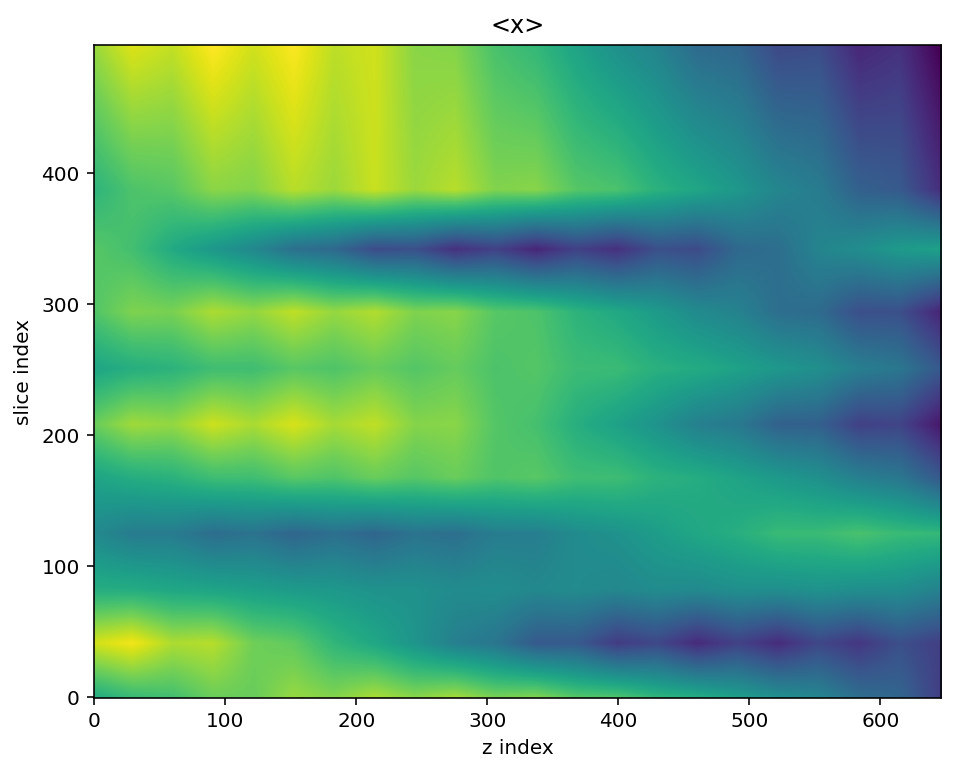

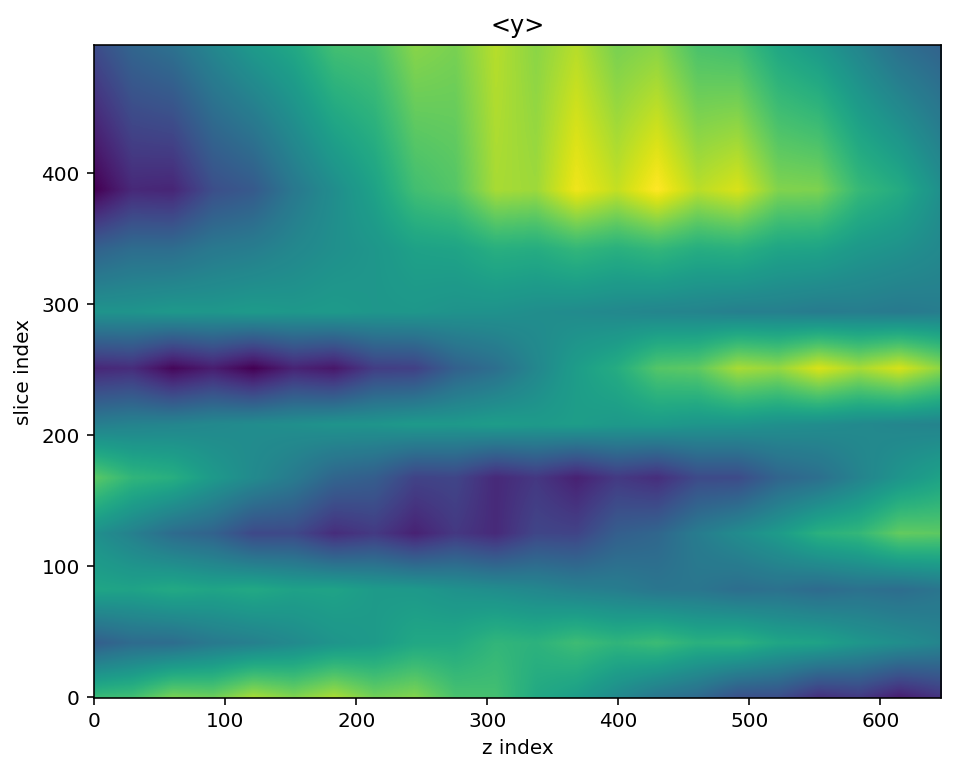

skipping aw


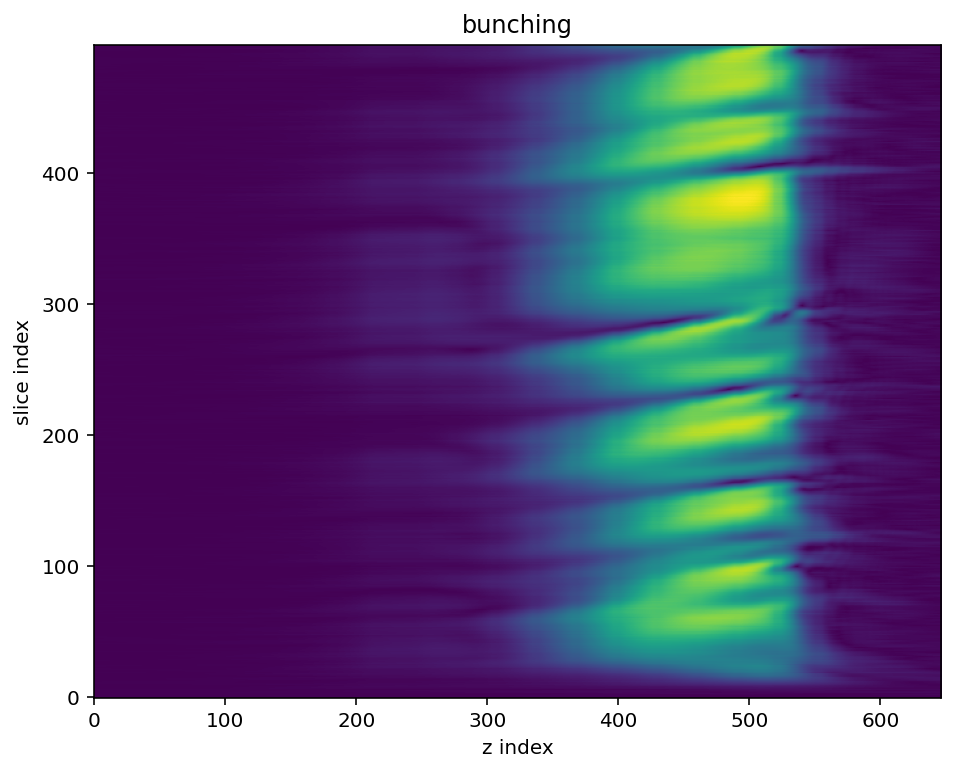

skipping current
skipping dfl


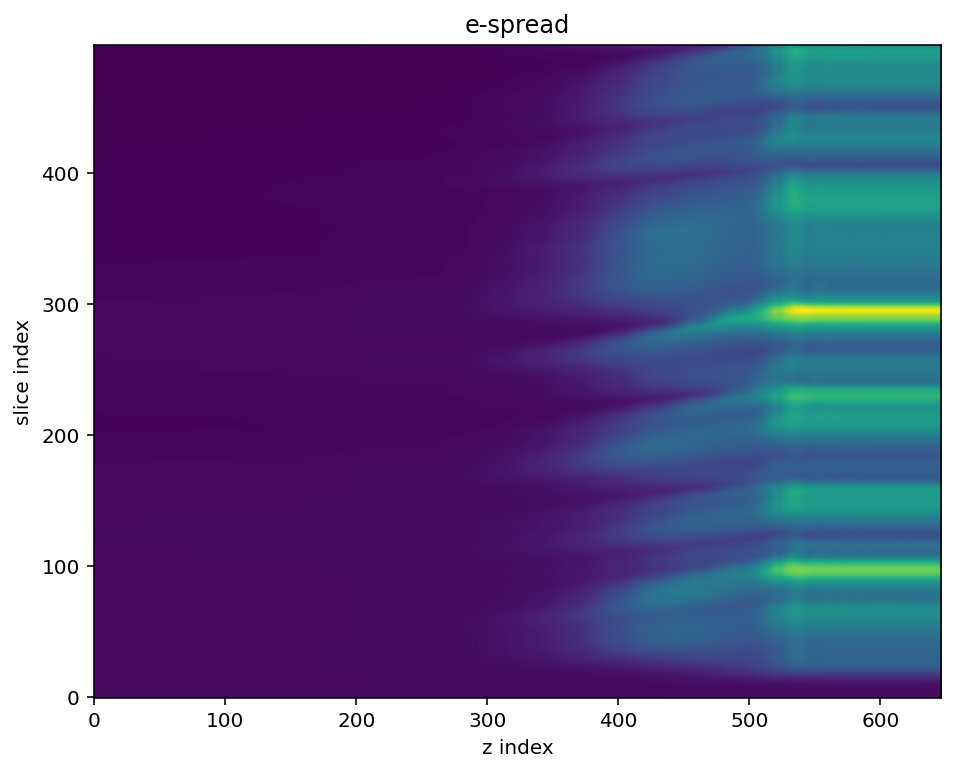

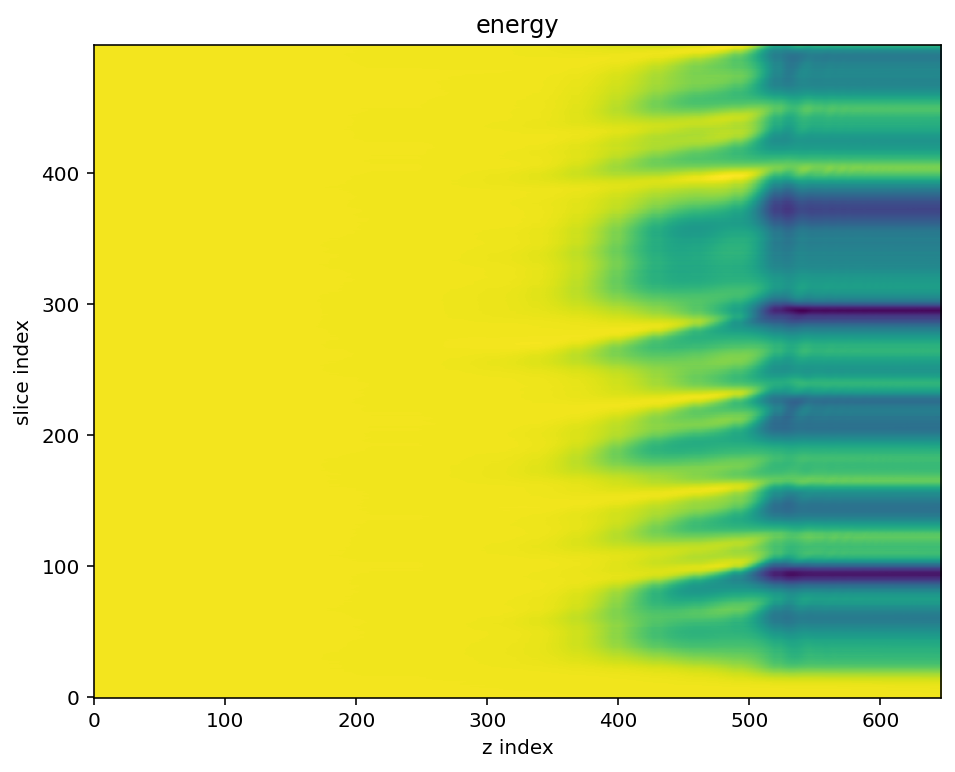

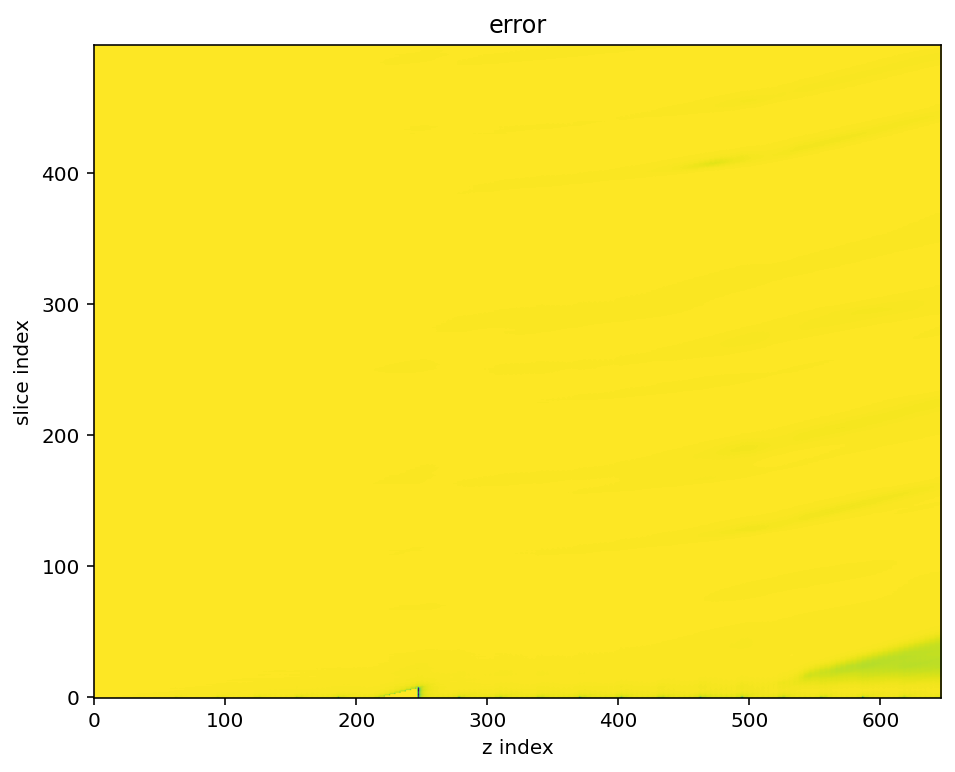

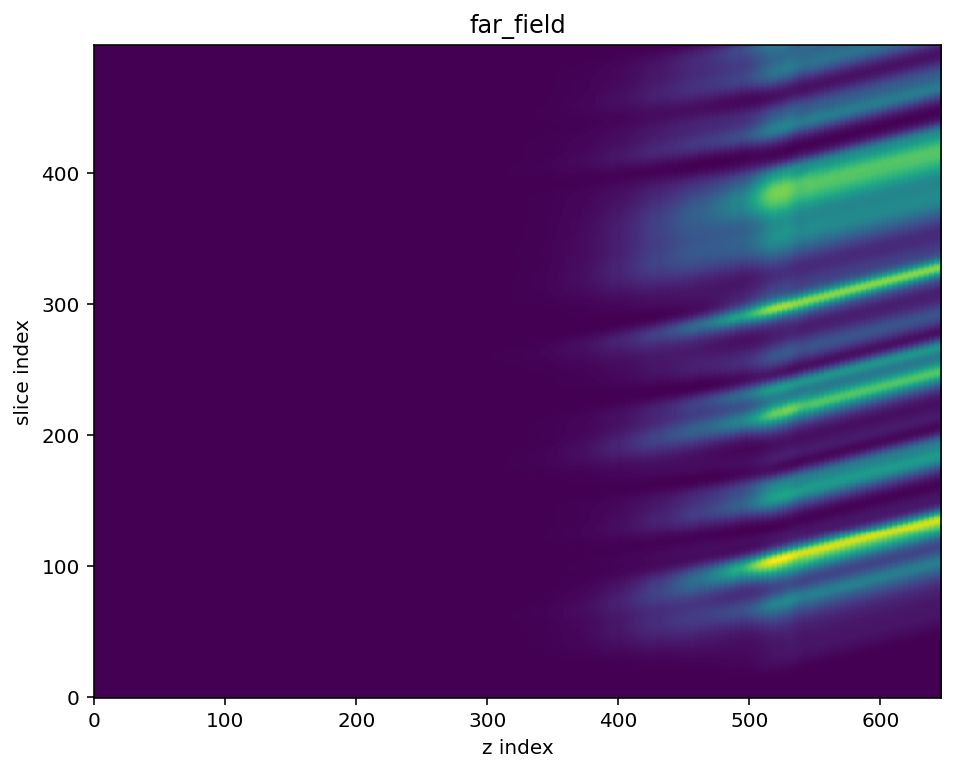

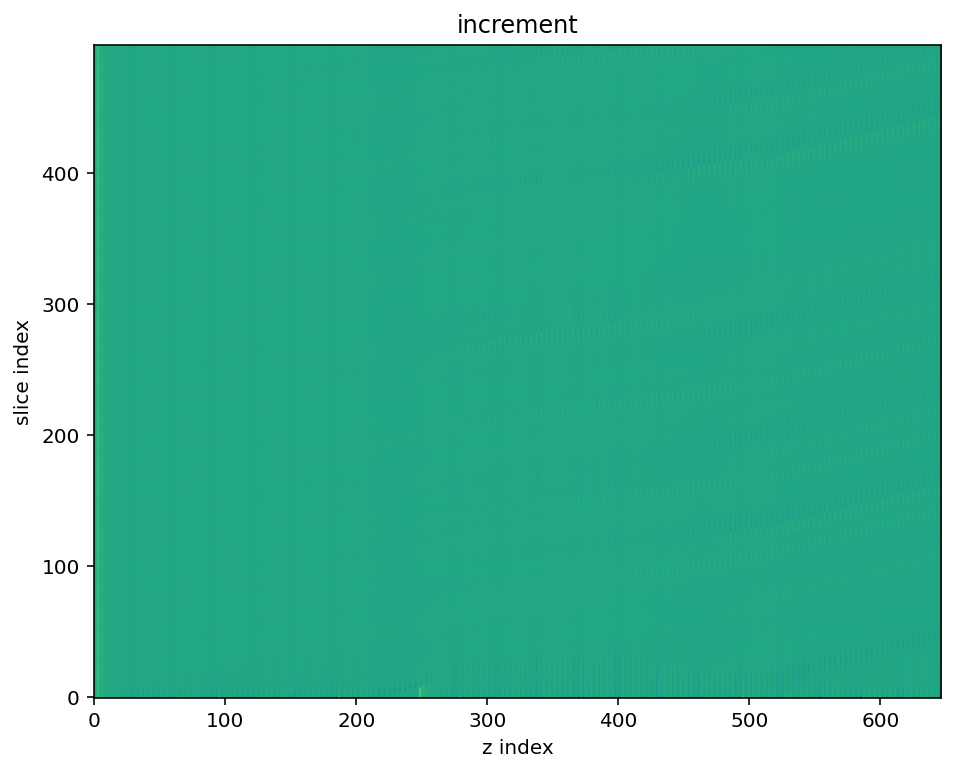

skipping index


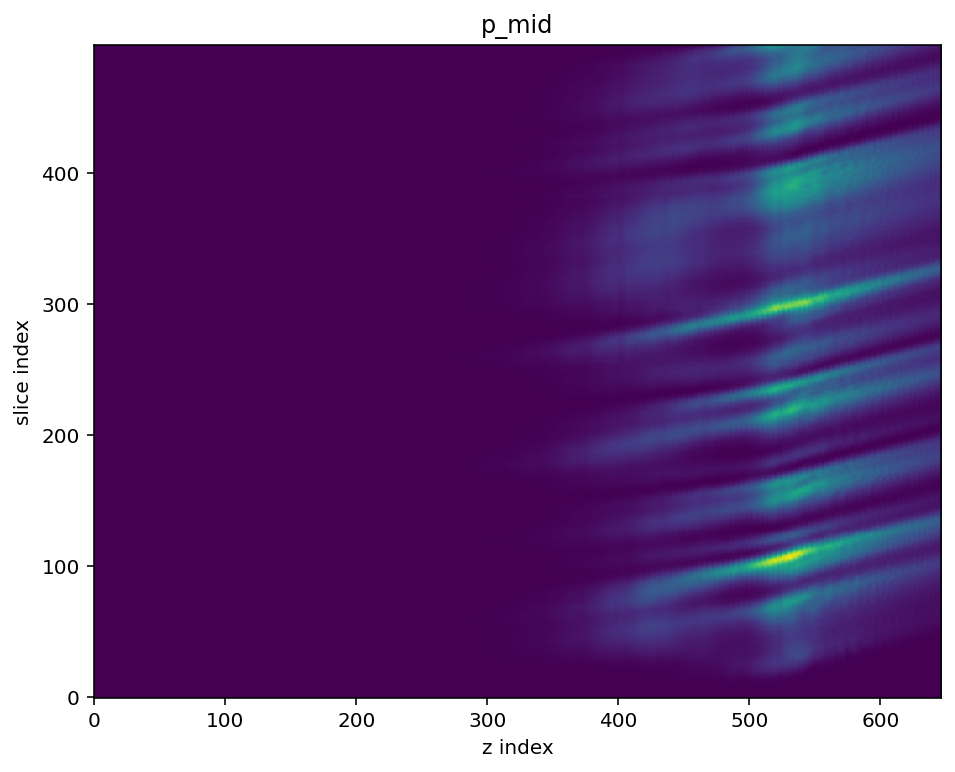

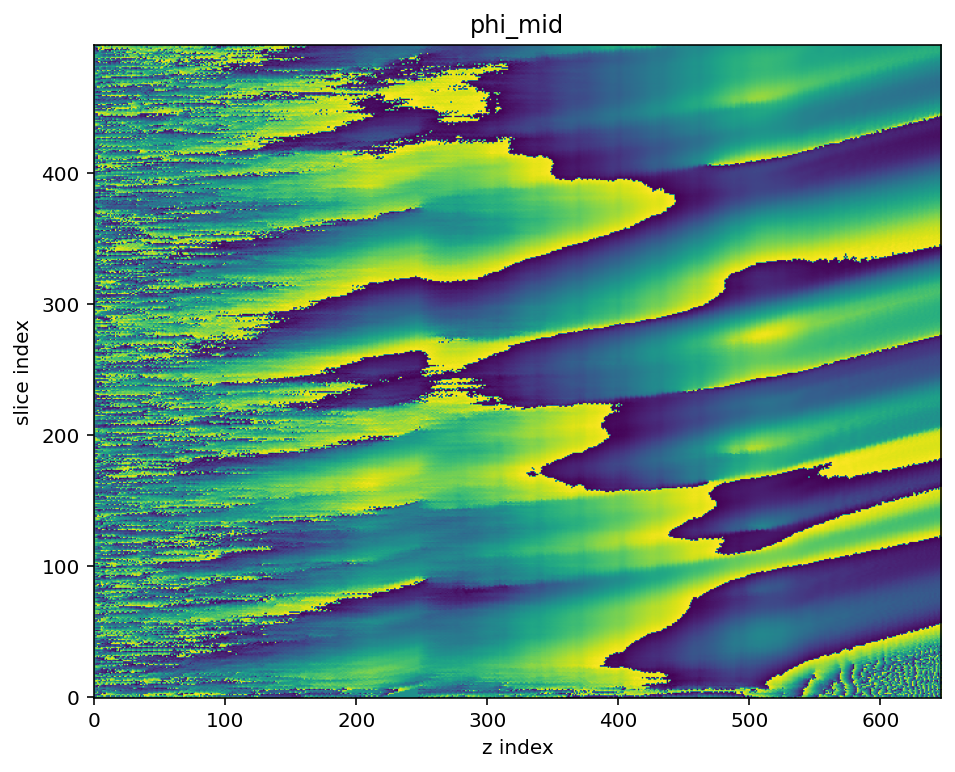

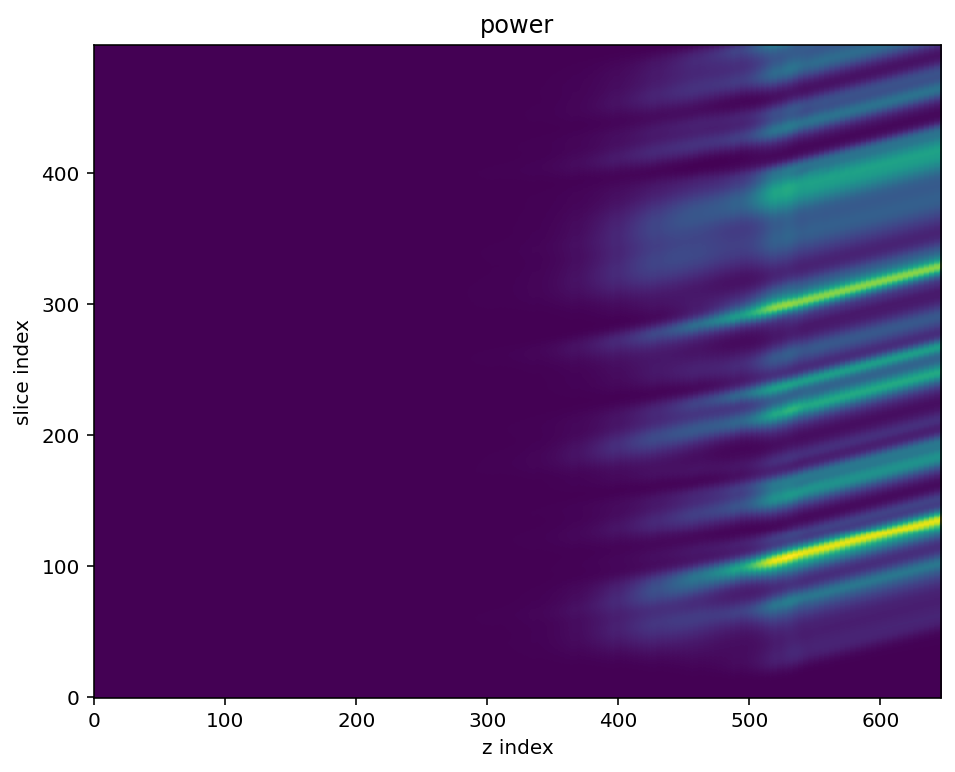

skipping qfld


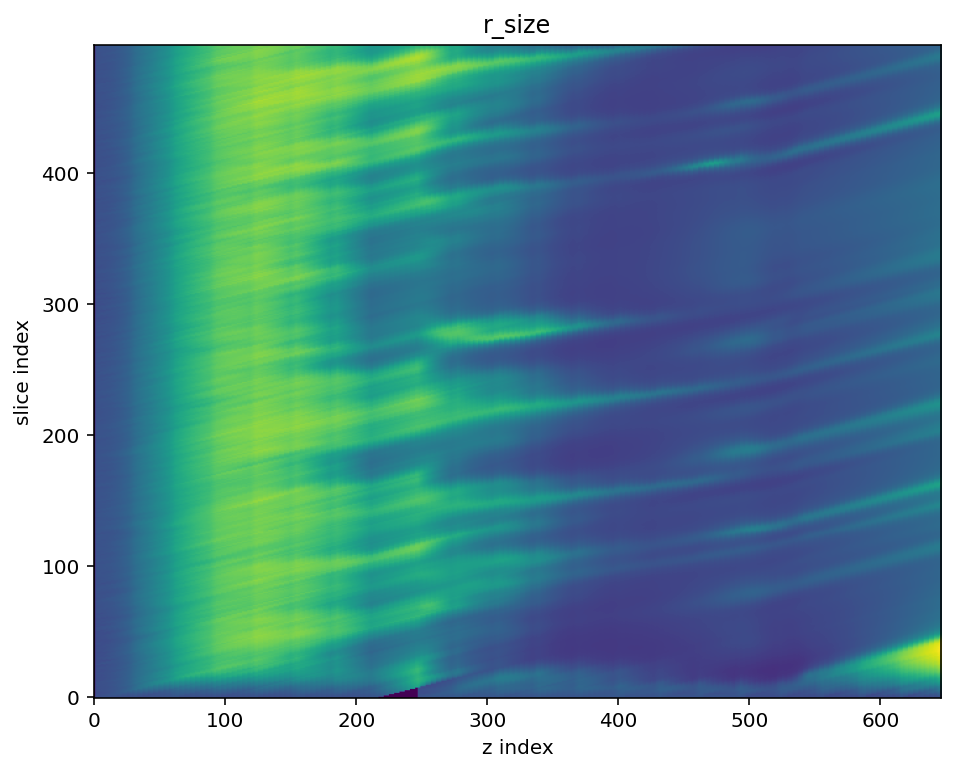

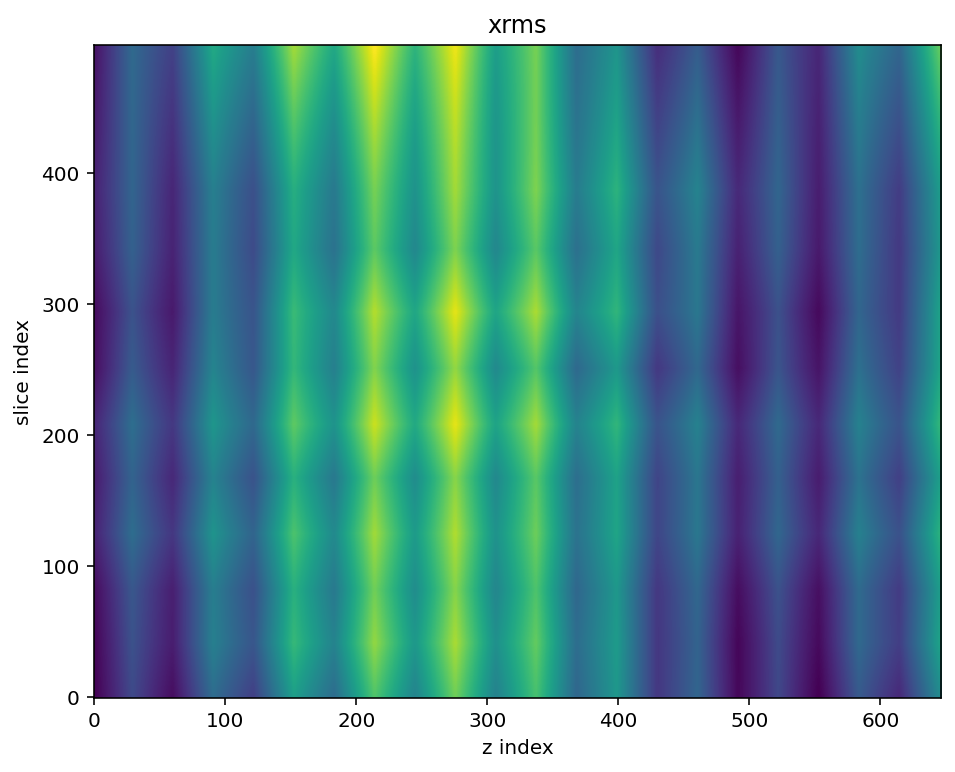

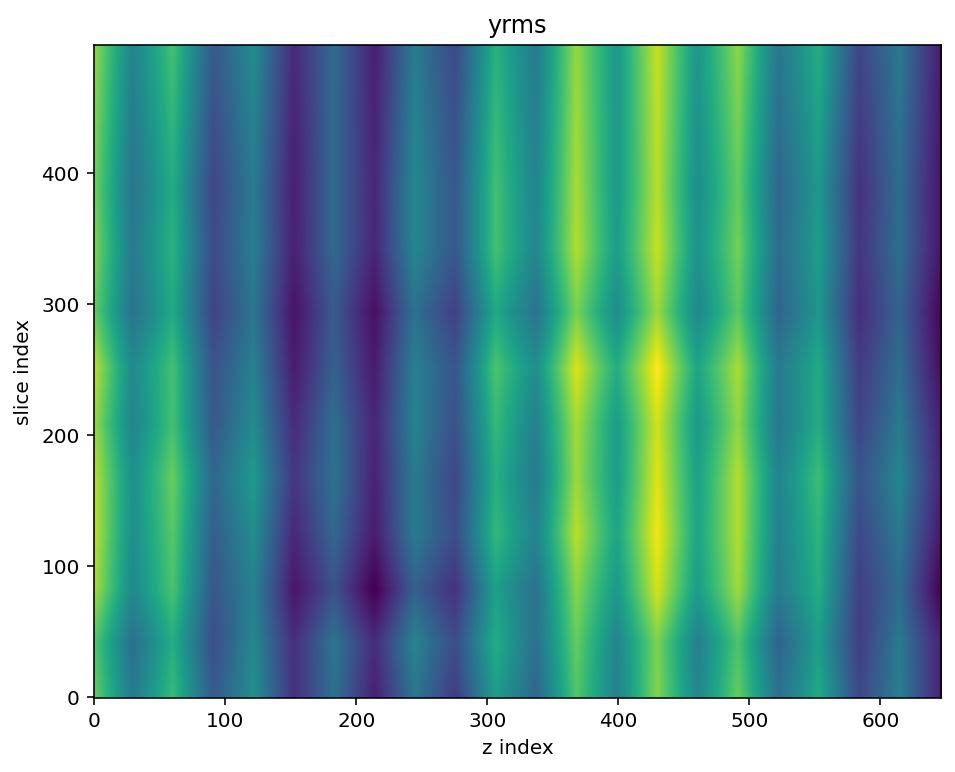

skipping z


In [8]:
# Visualize some output data
for k in G.output['data']:
    dat = G.output['data'][k]
    
    # Skip the 1D arrays (current, z, aw, q)
    if len(dat.shape) != 2:
        print('skipping', k)
        continue
    plt.title(k)
    plt.xlabel('z index')
    plt.ylabel('slice index')
    plt.imshow(dat, origin='lower')
    plt.show()

In [9]:
SCRATCH = os.path.expandvars('$HOME/SCRATCH/')
np.save(os.path.join(SCRATCH, 'dfl_phase.npy'), np.angle(G.output['data']['dfl']))

# Write wavefront

In [10]:
wfile = G.write_wavefront()

In [11]:
# Cleanup
os.remove(afile)
